# Explore Exercises

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. 

For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

Added exercises after I copied

4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

5. Explore your dataset with any other visualizations you think will be helpful.

6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [2]:
import wrangle
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split

In [3]:
train, validate, test = wrangle.wrangle_telco()
train.shape, validate.shape, test.shape

((1224, 7), (216, 7), (255, 7))

In [4]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled
1540,9084-OAYKL,20.80,58,1212.25,0.022455,0.139782,0.805556
1187,7036-TYDEC,104.00,69,7028.50,0.852794,0.810440,0.958333
1106,6625-FLENO,20.75,58,1185.95,0.021956,0.136749,0.805556
909,5485-ITNPC,85.90,66,5595.30,0.672156,0.645181,0.916667
1271,7569-NMZYQ,118.75,72,8672.45,1.000000,1.000000,1.000000


In [ ]:
# 1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along 
# with the regression line for each pair.

def plot_variable_pairs(df, drop_scaled_columns=True):
    if drop_scaled_columns == True:
        scaled_columns = [c for c in df.columns if c.endswith('_scaled')]
    
    g = sns.PairGrid(df) 
    g.map_diag(sns.distplot)
    g.map_offdiag(sns.regplot)
    
    return g
# add dropped scaled columns after walkthrough
# may need to debug

In [ ]:
plot_variable_pairs(train)

In [ ]:
# 2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new 
# feature tenure_years, in complete years as a customer.

def months_to_years(tenure_months, df):
    df['tenure_years'] = (tenure_months//12)
    return df
# changed to // after walkthrough
# see walkthough to use .assign to add column without changing df

In [ ]:
months_to_years(train.tenure, train)

In [ ]:
# 3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), 
# that outputs 3 different plots for plotting a categorical variable with a continuous variable, 
# e.g. tenure_years with total_charges
#train['tenure_cat'] = pd.cut(train.tenure_years, bins=[0, 1, 2, 4, 6], labels=['1', '2', '3-4', '5-6'])

    

In [ ]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
        plt.rc('font', size=13)
        plt.rc('figure', figsize=(13, 7))
        plt.subplot(311)
        sns.boxplot(data=df, y=continuous_var, x=categorical_var)
        plt.subplot(312)
        sns.violinplot(data=df, y=continuous_var, x=categorical_var)
        plt.subplot(313)
        sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
        plt.tight_layout()
        plt.show()

In [ ]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', train)

In [ ]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    plt.rc('font', size=13)
    plt.rc('figure', figsize=(13, 7))
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()   
    sns.violinplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()

In [ ]:
plot_categorical_and_continuous_vars('tenure_years', 'monthly_charges', train)

In [ ]:
# 4. Save the functions you have written to create visualizations in a file named explore.py. 
# Rewrite your notebook code so that you are using the functions imported from this file.

In [4]:
import explore

In [6]:
explore.months_to_years(train.tenure, train)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled,tenure_years
1540,9084-OAYKL,20.80,58,1212.25,0.022455,0.139782,0.805556,5.0
1187,7036-TYDEC,104.00,69,7028.50,0.852794,0.810440,0.958333,6.0
1106,6625-FLENO,20.75,58,1185.95,0.021956,0.136749,0.805556,5.0
909,5485-ITNPC,85.90,66,5595.30,0.672156,0.645181,0.916667,6.0
1271,7569-NMZYQ,118.75,72,8672.45,1.000000,1.000000,1.000000,6.0
...,...,...,...,...,...,...,...,...
1578,9339-FIIJL,85.95,72,6151.90,0.672655,0.709361,1.000000,6.0
1043,6295-OSINB,109.65,72,7880.25,0.909182,0.908653,1.000000,6.0
1378,8152-VETUR,97.70,72,6869.70,0.789920,0.792129,1.000000,6.0
596,3612-YUNGG,109.20,64,6741.15,0.904691,0.777306,0.888889,5.0


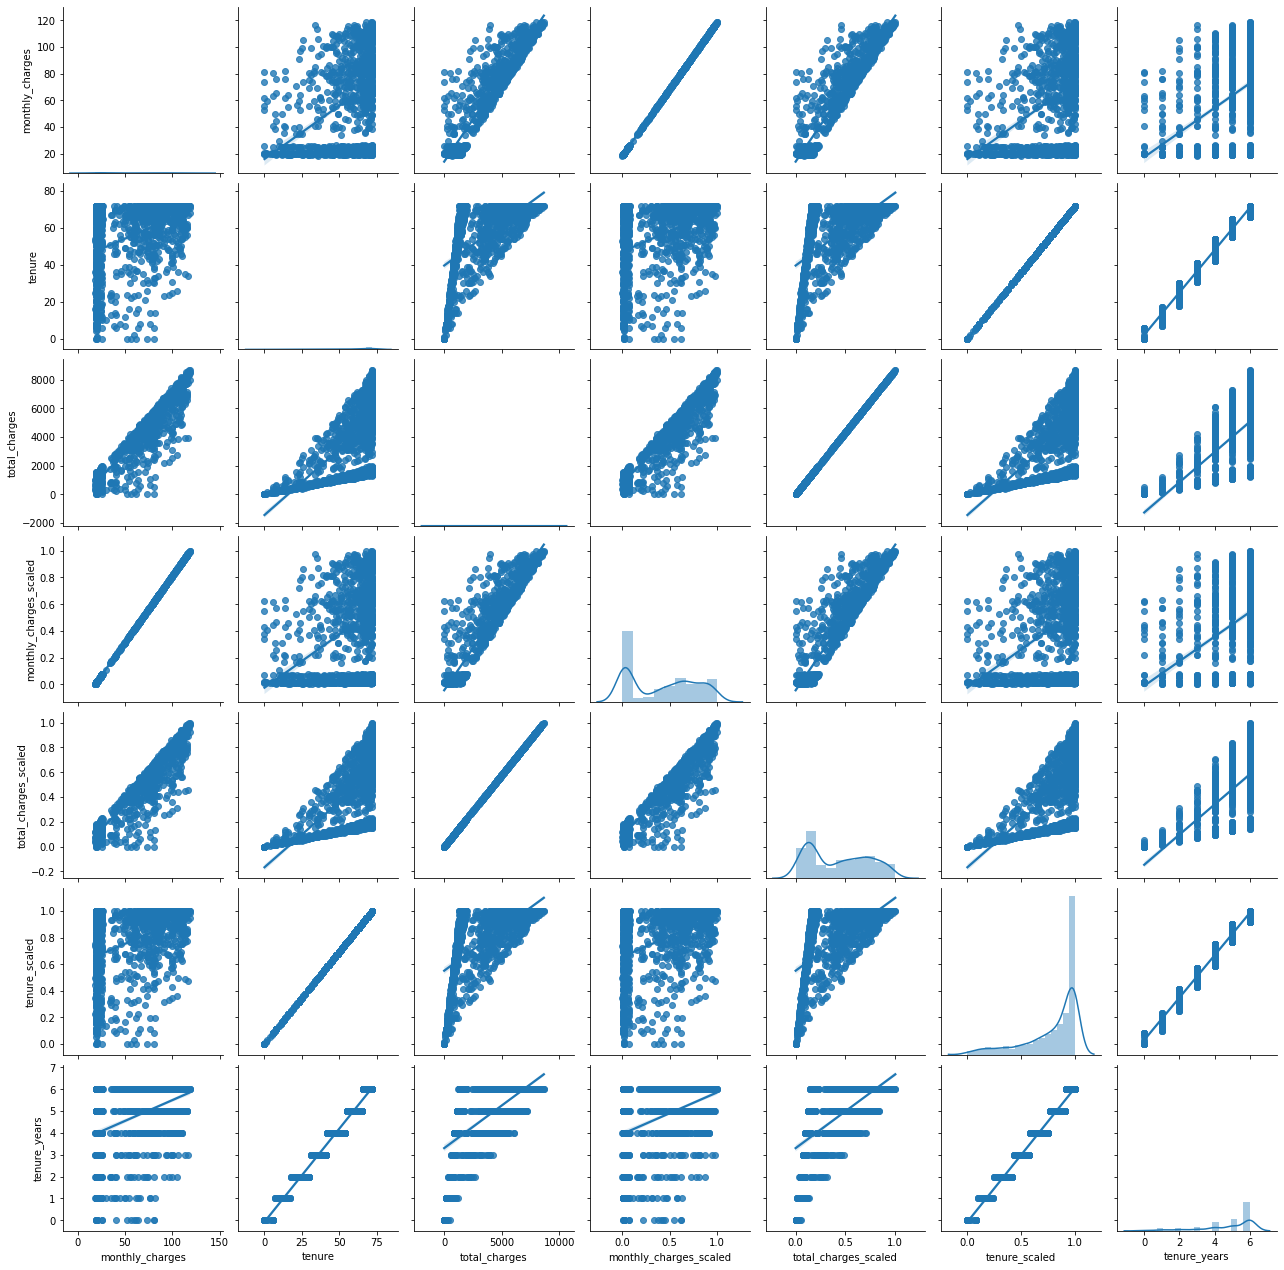

In [7]:
explore.plot_variable_pairs(train)

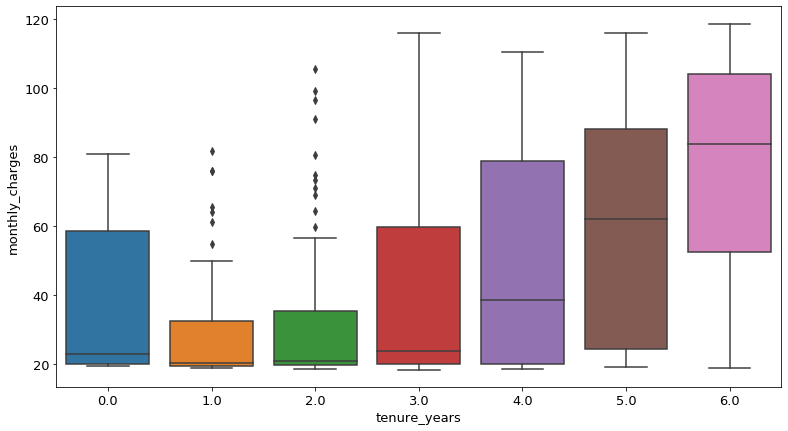

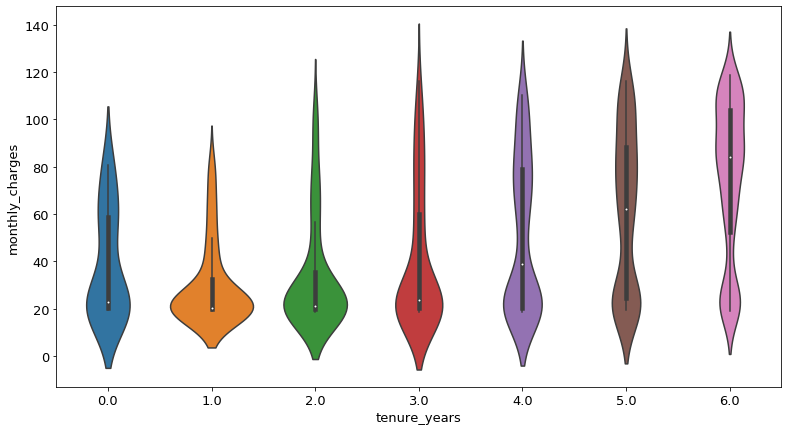

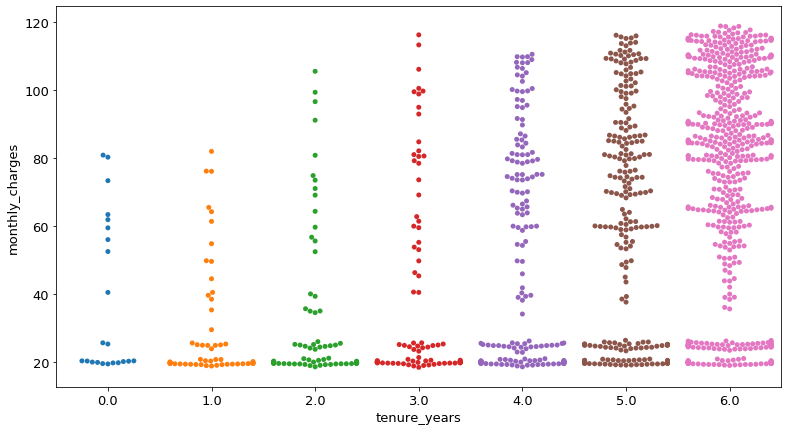

In [8]:
explore.plot_categorical_and_continuous_vars('tenure_years', 'monthly_charges', train)

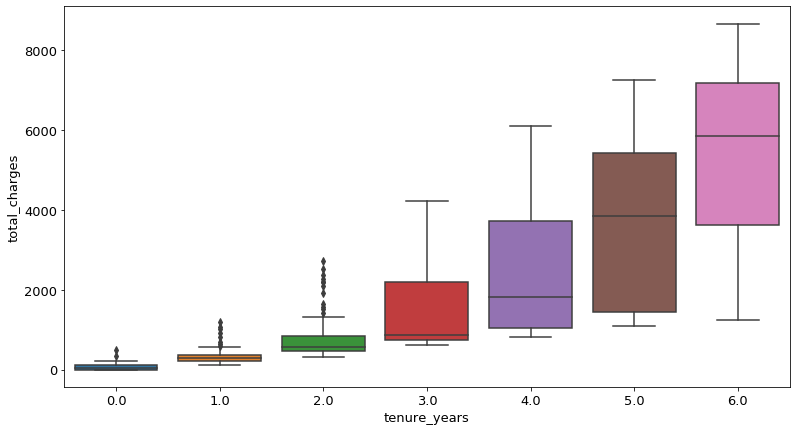

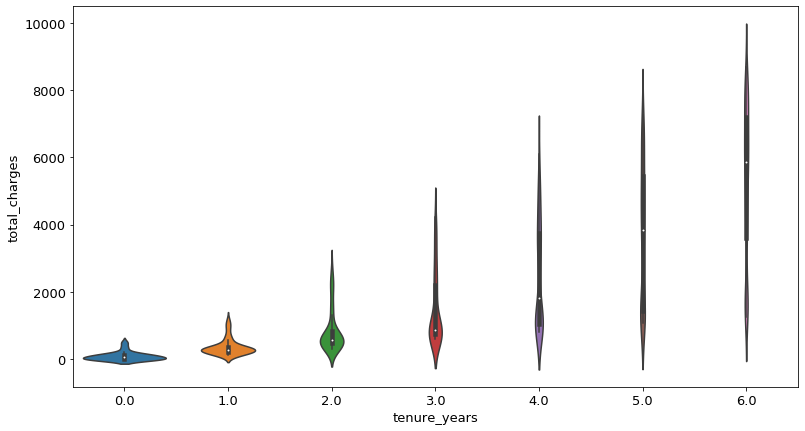

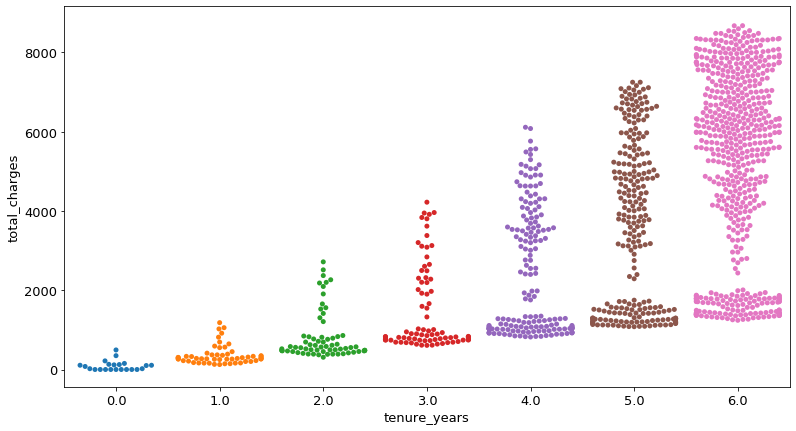

In [9]:
# 5. Explore your dataset with any other visualizations you think will be helpful.
explore.plot_categorical_and_continuous_vars('tenure_years', 'total_charges', train)

In [ ]:
# 6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.
# see explore_mall.ipnb